In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

prepared = pd.read_csv('../../datasets/wine_reviews/prepared/prepared_winemag-data-130k-v2.csv')

In [3]:
filtered = prepared.reindex(columns=['country', 'province', 'variety', 'winery', 'region_1', 'price', 'points'])
display(filtered)


,country,province,variety,winery,region_1,price,points
0,2,1,0,0,0,0.064935,0.35
1,2,2,1,1,1,0.058442,0.35
2,2,1,2,2,0,0.396104,0.35
3,3,3,3,3,2,0.071429,0.35
4,0,4,4,4,3,0.077922,0.35
...,...,...,...,...,...,...,...
100342,4,5,0,6809,4,0.155844,0.50
100343,2,1,2,6027,12,0.461039,0.50
100344,4,5,5,8789,4,0.168831,0.50
100345,4,5,0,4214,4,0.181818,0.50


# Considerando somente preço   

In [4]:
X = filtered['price'].values.reshape(-1, 1)
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

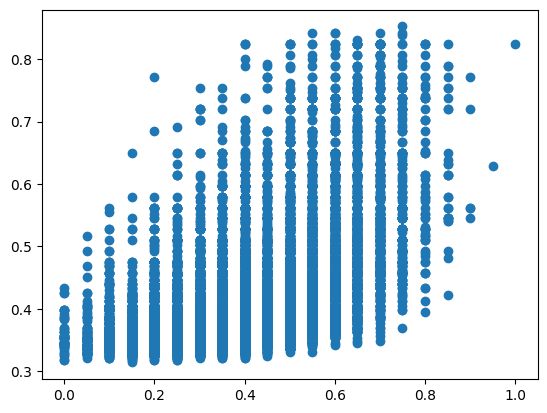

In [7]:
plt.scatter(y_test, y_pred)
plt.show()

In [8]:
print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {model.score(X_test, y_test)}")

Erro Quadrado Médio: 0.016039311633173188
Erro Quadrado Absoluto: 0.1017817788874646
Score: 0.2967198072608732


# Considerando todas as variáveis numéricas

In [9]:
display(filtered)

,country,province,variety,winery,region_1,price,points
0,2,1,0,0,0,0.064935,0.35
1,2,2,1,1,1,0.058442,0.35
2,2,1,2,2,0,0.396104,0.35
3,3,3,3,3,2,0.071429,0.35
4,0,4,4,4,3,0.077922,0.35
...,...,...,...,...,...,...,...
100342,4,5,0,6809,4,0.155844,0.50
100343,2,1,2,6027,12,0.461039,0.50
100344,4,5,5,8789,4,0.168831,0.50
100345,4,5,0,4214,4,0.181818,0.50


In [10]:
X = filtered.iloc[:, :-1].values
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

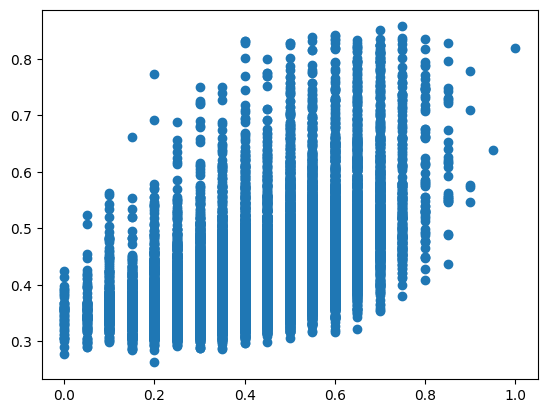

In [12]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()

In [13]:
print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {model.score(X_test, y_test)}")

Erro Quadrado Médio: 0.015862007520173443
Erro Quadrado Absoluto: 0.101347853298851
Score: 0.3044941103990455


# Regressão Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=100)
rf_regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
rf_y_pred = rf_regressor.fit(X_test.reshape(-1, 1), y_test.reshape(-1, 1))

print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Quadrado Absoluto: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {model.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))}")

/home/gui/src/unb/ia/ml/.venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gui/src/unb/ia/ml/.venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Erro Quadrado Médio: 0.2761335326357748
Erro Quadrado Absoluto: 0.2761335326357748
Score: 0.7238664673642252


In [14]:
with_category = filtered 
bins = [0, 0.33, 0.67, 1]
labels = [0, 1, 2]
with_category['points'] = pd.cut(prepared['points'], bins=bins, labels=labels, include_lowest=True)
display(with_category)
display(with_category['points'].value_counts())

,country,province,variety,winery,region_1,price,points
0,2,1,0,0,0,0.064935,1
1,2,2,1,1,1,0.058442,1
2,2,1,2,2,0,0.396104,1
3,3,3,3,3,2,0.071429,1
4,0,4,4,4,3,0.077922,1
...,...,...,...,...,...,...,...
100342,4,5,0,6809,4,0.155844,1
100343,2,1,2,6027,12,0.461039,1
100344,4,5,5,8789,4,0.168831,1
100345,4,5,0,4214,4,0.181818,1


points
1    69317
0    26701
2     4329
Name: count, dtype: int64

# SVC

In [20]:
from sklearn.svm import SVC

X = with_category['price'].values
y = with_category['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='rbf')
model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

/home/gui/src/unb/ia/ml/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [22]:
y_pred = model.predict(X_test.reshape(-1, 1))

In [28]:
display(mean_absolute_error(y_pred, y_test))
display(mean_squared_error(y_pred, y_test))
display(model.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1)))

0.2761335326357748

0.2761335326357748

0.7238664673642252